In [2]:
#Conversor de Arquivos de Imagem RAW (IMG)
#do Planetary data System (PDS) do JPL
#
#Author: Wandeclayt M./@CeuProfundo
#
# 1. Importa arquivo como Array Numpy 1D;
# 2. Remove os Bytes iniciais (Header + Telemetria) do Array;
# 3. Altera (Reshape) a geometria do Array para 2D (linhas, colunas)
#
# N1836255843_1.RAW


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import misc
from scipy import ndimage
import math

In [3]:
NomeDoArquivo = input("nome do arquivo: ")
BytesHeader = int(input("bytes do header: "))
BytesTelemetria = int(input("bytes de telemetria: "))
ByteInicialdaImagem = BytesHeader + BytesTelemetria
SampleBits = int(input("sample bits: "))
ImageLines = int(input("image lines: "))
ImageCols = int(input("image cols: "))
PrefixBytes = int(input("prefix bytes: "))
PrefixPixels = int(8*PrefixBytes / SampleBits)

nome do arquivoN1836255843_1.RAW
bytes do header: 3216
bytes de telemetria: 536
sample bits: 8
image lines: 512
image cols: 512
prefix bytes: 24


In [5]:
ArquivoRaw = np.fromfile(NomeDoArquivo, dtype='int8', sep="")
print("ArquivoRaw.shape: %d", ArquivoRaw.shape)
print("ArquivoRaw: ", ArquivoRaw)
ArquivoSemHeader = ArquivoRaw[ByteInicialdaImagem:]
Imagem = ArquivoSemHeader.reshape(ImageLines,ImageCols+PrefixPixels)

ArquivoRaw.shape: %d (278184,)
ArquivoRaw:  [76 66 76 ... 66 66 67]


In [6]:
with open('Imagem.raw', 'wb') as f:
    np.save(f, Imagem)

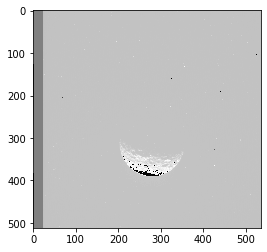

In [7]:
plt.imshow(Imagem, cmap="gray")
plt.show()